# HOG + LogRes (Training)

Tested on Google Colab 1.0.0 using Python 3.10.12

In [1]:
!pip list | grep google-colab
!python --version

google-colab                       1.0.0
Python 3.10.12


## Install necessary dataset

In [2]:
!kaggle datasets download -d caasperart/haarcascadeplatenumber --unzip --path '/content/dataset'

Dataset URL: https://www.kaggle.com/datasets/caasperart/haarcascadeplatenumber
License(s): unknown
100% 1.04G/1.04G [00:09<00:00, 97.2MB/s]
100% 1.04G/1.04G [00:09<00:00, 122MB/s] 


## Histogram of Oriented Gradients (HOG) for feature extraction

In [3]:
import numpy as np
import os
from skimage.feature import hog
import joblib
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import userdata

# Uncomment for Kaggle
# os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
# os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')

In [4]:
len(os.listdir('/content/dataset/DatasetCharacter/DatasetCharacter/0'))
len(os.listdir('/content/dataset/DatasetCharacter/DatasetCharacter/1'))

1090

In [5]:
train_dir = r'/content/dataset/DatasetCharacter/DatasetCharacter/'
labels_list = [i for i in os.listdir(train_dir)]
pathimg = [os.listdir(train_dir + i) for i in labels_list]

In [6]:
heights = []
widths = []

for i,j in enumerate(zip(pathimg,labels_list)):
  imgs,label = j
  for img in imgs:
      img = cv2.imread(train_dir+label+'/'+img)
      heights.append(img.shape[0])
      widths.append(img.shape[1])

In [7]:
print(f'Min Height: {min(heights)}, Min width: {min(widths)}')
print(f'Average Height: {sum(heights)/len(heights)}, Average width: {sum(widths)/len(widths)}')
print(f'Max Height: {max(heights)}, Max width: {max(widths)}')

Min Height: 28, Min width: 28
Average Height: 29.26540258903153, Average width: 28.439544502336574
Max Height: 60, Max width: 40


In [8]:
features = []
labels = []

for i,j in enumerate(zip(pathimg,labels_list)):
  imgs,label = j
  for img in imgs:
      img = cv2.imread(train_dir+label+'/'+img)
      img_res=cv2.resize(img,(32, 32),interpolation=cv2.INTER_AREA)
      img_gray= cv2.cvtColor(img_res,cv2.COLOR_BGR2GRAY)
      hog_img= hog(img_gray,orientations=9,pixels_per_cell=(4,4), cells_per_block=(1, 1))
      features.append(hog_img)
      labels.append(label)

In [9]:
print(len(pd.DataFrame(np.array(features))))
print(len(pd.DataFrame(np.array(labels))))

37234
37234


In [10]:
df = pd.DataFrame(np.array(features))
df['target'] = labels
df

,0,1,2,3,4,5,6,7,8,9,...,567,568,569,570,571,572,573,574,575,target
0,0.548346,0.000000,0.337484,0.000000,0.548346,0.533609,0.000000,0.000000,0.0,0.061772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
1,0.366372,0.382503,0.259064,0.382503,0.382503,0.382503,0.259064,0.382503,0.0,0.984209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
4,0.577350,0.000000,0.577350,0.000000,0.577350,0.000000,0.000000,0.000000,0.0,0.420727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37229,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
37230,0.577350,0.000000,0.577350,0.000000,0.577350,0.000000,0.000000,0.000000,0.0,0.569701,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
37231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
37232,0.500000,0.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.0,0.029871,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


In [11]:
df['target'].unique()

array(['X', 'D', 'Y', '8', '9', 'Q', 'K', '3', '2', 'U', 'R', '1', 'S',
       '4', '7', 'P', 'E', '0', 'I', 'T', 'L', 'A', 'M', 'O', 'F', 'W',
       '5', '6', 'G', 'C', 'B', 'H', 'V', 'J', 'Z', 'N'], dtype=object)

<Axes: xlabel='target', ylabel='count'>

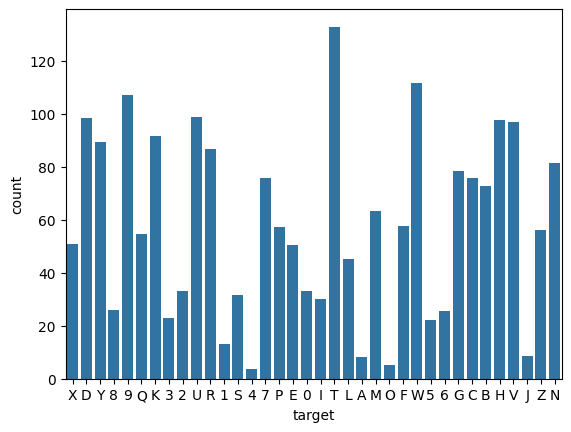

In [12]:
sns.countplot(x='target', data=df)

In [13]:
x = np.array(df.iloc[:,:-1])
y = np.array(df['target'])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=42)

In [15]:
from imblearn.over_sampling import SMOTE

# SMOTE to handle imbalance class
sm = SMOTE(random_state=0)
sm_x,sm_y=sm.fit_resample(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


<Axes: xlabel='target', ylabel='count'>

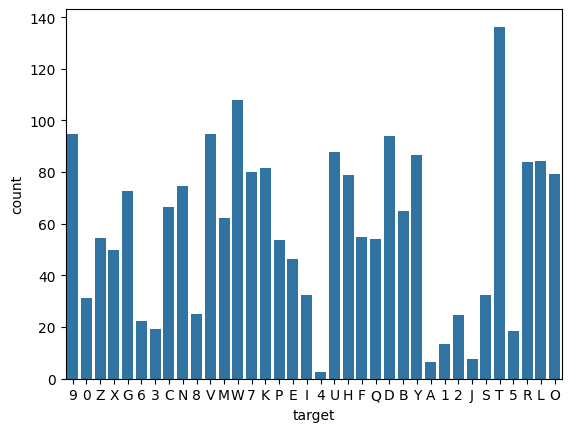

In [16]:
bal_df = pd.DataFrame(sm_x)
bal_df['target']=pd.DataFrame(sm_y)
sns.countplot(x='target', data=bal_df)

In [17]:
bal_df['target'].value_counts()

,count
target,
9,983
0,983
H,983
F,983
Q,983
D,983
B,983
Y,983
A,983


## Logistic Regression (LogRes) for classification

In [18]:
lreg = LogisticRegression()
clf=lreg.fit(sm_x, sm_y)
y_pred = clf.predict(x_test)
print('Accuracy {:.2f}'.format(clf.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy 0.92
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       241
           1       0.89      0.88      0.89       237
           2       0.97      0.97      0.97       218
           3       0.95      0.93      0.94       256
           4       0.95      0.95      0.95       218
           5       0.98      0.95      0.96       250
           6       0.93      0.93      0.93       228
           7       0.94      0.94      0.94       196
           8       0.94      0.92      0.93       224
           9       0.96      0.96      0.96       231
           A       0.94      0.90      0.92       235
           B       0.93      0.90      0.92       246
           C       0.89      0.87      0.88       210
           D       0.90      0.94      0.92       230
           E       0.88      0.89      0.88       192
           F       0.92      0.90      0.91       209
           G       0.85      0.90      0.87       203
           H 

In [19]:
# Save model
os.makedirs('results', exist_ok=True)
joblib.dump(clf, r'results/hog_logres_model.pkl')

['results/hog_logres_model.pkl']

For prediction, open "eval.ipynb"